<a href="https://colab.research.google.com/github/marcon21/anlp-labs/blob/main/02_ANLP_Grammar_Based_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start by copying this into your Google Drive!!

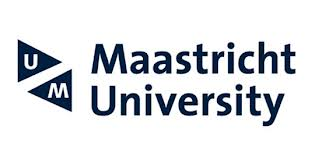
#Faculty of Science and Engineering - Department of Advanced Computer Sciences
# Course Advanced Natural Language Processing - Tutorial Grammar-based NLP

By Jan Scholtes

Version 2024-2025.1


---



Welcome to the tutorial on grammar-based NLP. In this notebook you will learn how traditional, grammar-based approaches to deal with syntactic structures, semantics, co-reference & pronoun resolution, and negation handling as discussed in the course Syntax and Semantics.

These methods have been used since the 1970's. In many aspects, they are limited and often also slow. The goal of this tutorial is to let you experience hands-on the challenges in NLP (especially dealing with ambiguity), but also with the limitations of these grammar-based approaches (e.g. not being able to deal with ambiguity, wrong spelling or wrong grammatical use of words or other unexpected situations). This will help you understand why statistical and deep-learning methods are so much better for many of the NLP tasks we discuss in this course.

In this notebook, we will use the Stanford NLTK library.



# Load NLTK

In [ ]:
import nltk

NLTK comes with many corpora, toy grammars, trained models, etc. A complete list is posted at: https://www.nltk.org/nltk_data/

To install the data, first install NLTK (see https://www.nltk.org/install.html), then use NLTK’s data downloader as described below.

Apart from individual data packages, you can download the entire collection (using “all”), or just the data required for the examples and exercises in the book (using “book”), or just the corpora and no grammars or trained models (using “all-corpora”).

The command below will start the interactive downloader, that also provides you the option to list all modules present in NLTK.

Make sure to quit the interactive download in order to continue!

In [ ]:
nltk.download()

Now let's load most of the most important components we need today:

In [ ]:
nltk.download('book')

# Load Data

In [ ]:
from nltk.book import *

Let's use Moby Dick for now and print the first 1000 chars of the book.

In [ ]:
list_of_text = text1
print(list_of_text[0:1000:1]) # print first 1000 chars

Let's convert this list to a long string as this is what NLTK requires as input and this is what you would normally get form any preprocessing text-extraction process.

In [ ]:
RawTextMobyDick = ""
for x in list_of_text:
  RawTextMobyDick = RawTextMobyDick + " " + x
print(RawTextMobyDick)

# Sentence Detection

Next we recognize sentences.

In [ ]:
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
sentences = tokenizer.tokenize(RawTextMobyDick)
i = 0
for x in sentences:
  print(x)
  i += 1
  if i == 30:   #limit sentences that are printed to 30
    break


# Tokenize

First we tokenize the text. We will leave the punctuation in as we need them later for the linguistic operations we plan to performs.

In [ ]:
words = nltk.tokenize.word_tokenize(RawTextMobyDick)
i = 0
for x in words:
  print(x)
  i += 1
  if i == 50:   #limit words that are printed to 50
    break

# Stemming in NLTK (this is done by using rules)

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

i = 0
for w in words:
    print(w, " : ", ps.stem(w))
    i += 1
    if i == 100:
      break

There is a lot wrong with the above text. It is highly mutilated. So, stemming is not suited for advanced natural language processing. Lemmatization is. but before we can do that, we first need to understand what Part-of-Speech tagging is, because we need that for the lemmatization.

# POS Tagging

In corpus linguistics, part-of-speech tagging (POS tagging or PoS tagging or POST), also called grammatical tagging is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech,based on both its definition and its context. A simplified form of this is commonly taught to school-age children, in the identification of words as nouns, verbs, adjectives, adverbs, etc.

Schools commonly teach that there are 9 parts of speech in English: noun, verb, article, adjective, preposition, pronoun, adverb, conjunction, and interjection.

However, there are clearly many more categories and sub-categories. For nouns, the plural, possessive, and singular forms can be distinguished. In many languages words are also marked for their "case" (role as subject, object, etc.), grammatical gender, and so on; while verbs are marked for tense, aspect, and other things. In some tagging systems, different inflections of the same root word will get different parts of speech, resulting in a large number of tags. For example, NN for singular common nouns, NNS for plural common nouns, NP for singular proper nouns. Other tagging systems use a smaller number of tags and ignore fine differences or model them as features somewhat independent from part-of-speech.

In linguistics, a treebank is a parsed text corpus that annotates syntactic or semantic sentence structure. The construction of parsed corpora in the early 1990s revolutionized computational linguistics, which benefitted from large-scale empirical data.

The Penn-Tree Bank is a well known annotated corpus. The Penn Treebank (PTB) project selected 2,499 stories from a three year Wall Street Journal (WSJ) collection of 98,732 stories for syntactic annotation. It contains various syntactic tags, among them Part-of-Speech tags. The Penn-Tree bank is included in NLTK.

The following function can be called to view a list of all possible part-of-speech tags. The extensive list includes PoS tags such as VB (verb in base form), VBD (verb in past tense), VBG (verb as present participle) and so on.

In [ ]:
nltk.help.upenn_tagset()

Now let's try POS tagging on our example text. For this, we can either use a list of sentences or a long lists of words. In our example we will use the list of words.

In [ ]:
from nltk import pos_tag
words_with_pos = nltk.pos_tag(words)
i = 0
for w in words_with_pos:
    print(w)
    i += 1
    if i == 100:
      break

# Better Lemmatization with POS tags

As we discussed above: stemming algorithms just remove a suffix or prefix from a word. This results in highly mutilated text and many non-linguistic words.

Lemmatization takes more linguistic knowledge into consideration and implements a so-called morphological analysis of the words. It returns the "lemma" which is the base form of all its inflectional forms. For this, it needs to know the grammatical role of a word. We can use the Part-of-Speech tag for this.

#Exercise 1: Stemming versus Lemmatization
To address the limits of stemming, we need to apply lemmatization.

1a. Can you write the code where you use the token in combination with the POS tag and create the proper lemma for each token for the first few sentences in Moby Dick?

1b. What do you observe with words such a BETTER and WAS/WERE?



In [ ]:
YOU CODE HERE

1.b YOUR ANSWER HERE:

We can also write some code to extract all Noun Phrases using the POS tags. This is very usefull to resolve the boundary and conjunction problem for proper names (e.g. "Victoria and Albert Museum").

In [ ]:
from nltk import pos_tag

sentence = str(sentences[4]) # we will take one sentence from the list of sentences

print(sentence)
sentence_words = nltk.tokenize.word_tokenize(sentence)
pos_sentence = nltk.pos_tag(sentence_words)

for w in pos_sentence:
    if w[1]=='NN':
      print(w)
    if w[1]=='NNS':
      print(w)


# Phrase Detection

In sentences, there is a higher syntactic structure above that of POS-tages. The most common ones are Noun Phrases and Verb Phrases. Detecting these can be very usefull for various linguistic operations where we need to understand the beginning and the end of a NOUN or to understand if we are dealing with SINGULAR or PLURAL NOUNS. Let's first detect a NOUN PHRASE

In [ ]:
from nltk import pos_tag

sentence = str(sentences[3]) # we will take one sentence from the list of sentences
sentence = "We can't deal with this"
sentence = sentence.replace('"','')
print(sentence)
sentence_words = nltk.tokenize.word_tokenize(sentence)
pos_sentence = nltk.pos_tag(sentence_words)

i = 0
for w in pos_sentence:
    print(w)
    i += 1
    if i == 100:
      break

grammar = 'NP: {<DT>?<JJ>*<NN>}'  # now define what we are looking for in NP's
cp = nltk.RegexpParser(grammar)
result = cp.parse(pos_sentence)
print(result)


#Exercise 2: Syntactic Phrase Detection

2a. Write your own code to detect Verb Phrases. Fill in the code below.

2b. What do you observe with respect to broken sentences, gramatically incorrect sentences and out-of-vocabulary words?



In [ ]:
2a. YOUR CODE HERE

2b. YOUR ANSWER HERE

# Deeper Syntactic Analysis

As we have seen in the lecture, the deep structure of a linguistic expression is a theoretical construct that seeks to unify several related structures. For example, the sentences "Pat loves Chris" and "Chris is loved by Pat" mean roughly the same thing and use similar words. Some linguists, Chomsky in particular, have tried to account for this similarity by positing that these two sentences are distinct surface forms that derive from a common (or very similar) deep structure.

NP's and VP's are a first step to discover such deeper structures. But there are other methods as well. We will look into Context Free Grammars, Probabilistic Context Free Grammars and Dependency Grammars.

# Context Free Grammar

An example of a context free grammar that is includes in NLTK can be found executing the code hereunder.

In [ ]:
from nltk.parse.generate import generate, demo_grammar
from nltk import CFG
grammar = CFG.fromstring(demo_grammar)
print(grammar)

The first 10 generated sentences by this grammar:

In [ ]:
for sentence in generate(grammar, n=10):
  print(' '.join(sentence))

All sentences of max depth 4 (including the top S):

In [ ]:
for sentence in generate(grammar, depth=4):
  print(' '.join(sentence))

The number of sentences of different max depths:

In [ ]:
i = 0
for sentence in generate(grammar, depth=3):
  i = i + 1
  # print(' '.join(sentence))   # uncomment if you wish to see all sentences
print("Number of sentences of depth 3: "+ str(i))

i = 0
for sentence in generate(grammar, depth=4):
  i = i + 1
  # print(' '.join(sentence))   # uncomment if you wish to see all sentences
print("Number of sentences of depth 4: "+ str(i))

i = 0
for sentence in generate(grammar, depth=5):
  i = i + 1
  # print(' '.join(sentence))   # uncomment if you wish to see all sentences
print("Number of sentences of depth 5: "+ str(i))

i = 0
for sentence in generate(grammar, depth=6):
  i = i + 1
  # print(' '.join(sentence))   # uncomment if you wish to see all sentences
print("Number of sentences of depth 6: "+ str(i))

i = 0
for sentence in generate(grammar):
  i = i + 1
  # print(' '.join(sentence))   # uncomment if you wish to see all sentences
print("Number of sentences of unlimited depth: "+ str(i))

In this case, there is a limit of 114 different sentences that can be generated by this simple grammar. More complex grammars o
often have infinite recursions and lead towards a recursion error. For that reason, we allways need to bound the number of generations with a CFG.

Try the example below:

In [ ]:
grammar = CFG.fromstring("""
  S -> A B
  A -> B
  B -> "b" | A
  """)
for sentence in generate(grammar):
  i = i + 1
  # print(' '.join(sentence))   # uncomment if you wish to see all sentences
print("Number of sentences of unlimited depth: "+ str(i))

#Syntactic Ambiguity

Let's take a closer look at syntactic ambiguity with the sentence: "I shot an elephant in my pajamas"

In the code examples hereunder, we show you how to access the grammar rules and components.

In [ ]:
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

In [ ]:
groucho_grammar

In [ ]:
type(groucho_grammar)

In [ ]:
groucho_grammar.start()

In [ ]:
groucho_grammar.productions()

In [ ]:
from nltk.grammar import *
groucho_grammar.productions(lhs=Nonterminal("NP"))

In [ ]:
groucho_grammar.productions(rhs=Nonterminal("Det"))

In [ ]:
pp = groucho_grammar.productions(rhs=Nonterminal("Det"))
pp[0]

In [ ]:
pp[0].lhs()

In [ ]:
pp[0].rhs()

NLTK comes with pre-implemented parsers for CFGs. Parsing a sentence with a CFG returns a list of parse trees. We can either look at their string representations or have the trees drawn graphically.

In [ ]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
trees = parser.parse(sent)
for tree in trees:
  print(tree)

The first one is:
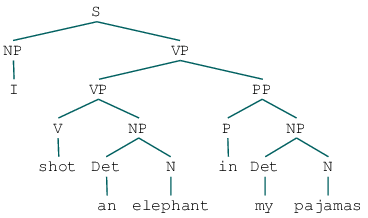


And the second one is:

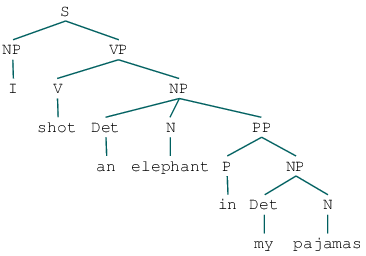



The first one is the more probable analysis: it shows that I am running around in my pajamas and I shoot an elephant. The second one describes an elephant that runs around in my pajamas that I shoot.

# Statistics to deal with linguistic ambiguity: PCFG

As we have discussed in the lecture, we can handle a parser to deal with the above ambiguity, by adding a linguistic probability to a production rule or a terminal. Such CFG grammars are called Probabilistic Context Free Grammars (PCFG)

PCFG rules are defined in the same way. In addition a probability is assigned to each right-hand side of a rule. All probabilities for one particular left-hand side have to sum up to 1.

The following code imports the PCFG class from NLTK:



In [ ]:
from nltk import PCFG

Next, define the grammar:

In [ ]:
pcfg1 = PCFG.fromstring("""
    S -> NP VP [1.0]
    NP -> Det N [0.5] | NP PP [0.25] | N [0.25]
    PP -> P NP [1.0]
    VP -> VP PP [0.1] | V NP [0.7] | V [0.2]
    N -> 'woman' [0.3] | 'man' [0.3] | 'telescope' [0.3] | 'mixer' [0.1]
    Det -> 'the' [0.6] | 'a' [0.2] | 'my' [0.2]
    V -> 'killed' [0.35] | 'saw' [0.65]
    P -> 'with' [0.61] | 'under' [0.39]
""")

Print all productions:

In [ ]:
print(pcfg1)

We can estimate these probabilities from a corpus, such as the UPENN corpus.

Once we have such a grammar, we can use it for parsing.

The code hereunder shows you how this works for a ambigious sentence we discussed in the lecture: "I saw John with my Telescope on the Hill"

In [ ]:
from nltk import PCFG
toy_pcfg1 = PCFG.fromstring("""
  S -> NP VP [1.0]
  NP -> Det N [0.5] | NP PP [0.25] | 'John' [0.1] | 'I' [0.15]
  Det -> 'the' [0.8] | 'my' [0.2]
  N -> 'man' [0.5] | 'telescope' [0.5]
  VP -> VP PP [0.1] | V NP [0.7] | V [0.2]
  V -> 'ate' [0.35] | 'saw' [0.65]
  PP -> P NP [1.0]
  P -> 'with' [0.61] | 'under' [0.39]
  """)
print(toy_pcfg1)

In [ ]:
amb_sentence = ['I', 'saw', 'John', 'with', 'my', 'telescope']


parser = nltk.ChartParser(toy_pcfg1)
trees = parser.parse(amb_sentence)
for tree in trees:
  print(tree)

#Exercise 3: Linguistic Ambiguity

3a. Explain what you observe.

3b. Which of the two parses is more probable?

3c. Which rule / probability makes the difference in the disambiguation?

YOUR ANSWER HERE:

3a.


3b.


3c.




# Dependency Grammar

Dependency Parsing is the process to analyze the grammatical structure in a sentence and find out related words as well as the type of the relationship between them.
Dependency grammars allow us to understand (long-term) relations between words and phrases in a sentence.

Dependency grammars are well suited for co-referece and pronoun resolution and for negations handling.

Let's take a closer look...

In [ ]:
from nltk.grammar import DependencyGrammar
from nltk.parse import (
  DependencyGraph,
  ProjectiveDependencyParser,
  NonprojectiveDependencyParser,
  )
treebank_data = """Pierre  NNP     2       NMOD
Vinken  NNP     8       SUB
,       ,       2       P
61      CD      5       NMOD
years   NNS     6       AMOD
old     JJ      2       NMOD
,       ,       2       P
will    MD      0       ROOT
join    VB      8       VC
the     DT      11      NMOD
board   NN      9       OBJ
as      IN      9       VMOD
a       DT      15      NMOD
nonexecutive    JJ      15      NMOD
director        NN      12      PMOD
Nov.    NNP     9       VMOD
29      CD      16      NMOD
.       .       9       VMOD
"""
dg = DependencyGraph(treebank_data)
dg.tree().pprint()


In [ ]:
for head, rel, dep in dg.triples():
    print(
        '({h[0]}, {h[1]}), {r}, ({d[0]}, {d[1]})'
        .format(h=head, r=rel, d=dep)
    )

#Exercise 4: Dependendy Grammars foor Co-Reference Resolution and Negation Scope Handling

Explain (step by step) how a dependency grammar analysis can be used to disambiguate HE and determine the scope of NOT in the following sentence: "Pierre Vinken is a 61 years old CEO, HE is also the executive director from five other companies. He is NOT the Pierre Vinken that is a famous football player in Belgium."

YOUR ANSWER:

a. Provide dependency graph for the sentence: "Pierre Vinken is a 61 years old CEO, HE is also the executive director from five other companies. He is NOT the Pierre Vinken that is a famous football player in Belgium."

b. Describe the steps for the Disambiguation of HE:

c. Describe the steps to determine the scope of NOT:

